# Опис на податочното множество

Податоците се земени од Светската здравствена организација (СЗО) и се фокусираат на смртната стапка во сообраќајните незгоди. Објавени се во 2018 година како дел од проектот "Global status report on road safety 2018". Извештајот содржи повеќе податочни множества кои опишуваат различни детали за повеќе држави околу спроведливост на законски регулативи во државите, закони и стандарди за појаси, кациги, итн. Податочното множество што ќе го разгледуваме има големина од 175 x 13.

За смртната стапка во сообраќајот се користи модел за регресија, предвидување колкав е бројот на смртни случаеви за одредена земја бидејќи не сите земји располагаат со добра евиденција на истите податоци. Во процесот на регресија за земјите кои не располагаат со добра евиденција се земаат предвид повеќе фактори како што се економски статус, колку законите за сообраќај се спроведуваат, квалитет на патишта и многу др.


## Комплетност на податоците
Во овој дел ја гледаме комплетноста на податоците, т.е. колку полиња од класите што се разгледуваат содржат податоци, изразено во проценти.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib notebook
theTable = pd.read_excel("Tabela WBS proekt.xlsx")
labels = theTable.columns.values
def calculate_percentage_of_completeness():
    nmOfRows = len(theTable.index)
    completeness_percentage = dict()
    for columnName in labels:
        perecentage = theTable[columnName].notnull().sum() / nmOfRows * 100
        completeness_percentage[columnName] = perecentage
    return completeness_percentage

<IPython.core.display.Javascript object>


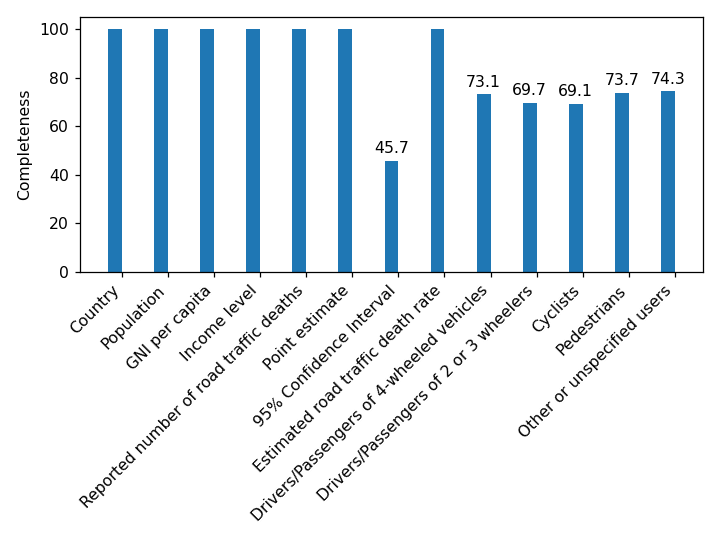

In [73]:
completenessPercentage = calculate_percentage_of_completeness()
x = np.arange(len(labels))
width = 0.3
fig, ax = plt.subplots()
rectangels = ax.bar(x-width/2, completenessPercentage.values(),width)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for idx,rect in enumerate(rects):
        if completenessPercentage.get(labels[idx]) ==100.0:
            continue
        height = rect.get_height()
        ax.annotate('{}'.format(round(completenessPercentage.get(labels[idx]),1)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rectangels)
ax.set_ylabel('Completeness')
ax.set_xticks(x);
ax.set_xticklabels(labels,rotation=45,ha='right');
fig.tight_layout()

Последните 5 категории ни укажуваат колкава е бројката на пешаци, велосипедисти, возачи на моторни возила и др во сообраќајот. Поради тоа што не секоја земја чува податоци за таа бројка, тие категории се некомплетни. Во просек комплетноста изнесува околу 70%.

## Просек на смртна стапка по ниво на примања на една држава

In [74]:
def calculateDeathRateByIncomeLevel():
    nm_of_low,sum_of_low = 0,0
    nm_of_middle,sum_of_middle = 0,0
    nm_of_high,sum_of_high = 0,0
    for idx,value in enumerate(theTable["Income level"]):
        if value == "Low":
            sum_of_low+=theTable["Estimated road traffic death rate"][idx]
            nm_of_low+=1
        elif value=="Middle":
            sum_of_middle+=theTable["Estimated road traffic death rate"][idx]
            nm_of_middle+=1
        elif value=="High":
            sum_of_high+=theTable["Estimated road traffic death rate"][idx]
            nm_of_high+=1
    return [nm_of_low,nm_of_middle,nm_of_high],[round(sum_of_low,2),round(sum_of_middle,2),round(sum_of_high,2)]
nmOfAllIncomeLevels, deathRateSumPerIncomeLevel=calculateDeathRateByIncomeLevel()
lowIncomeMean = round(deathRateSumPerIncomeLevel[0]/nmOfAllIncomeLevels[0],2)
middleIncomeMean = round(deathRateSumPerIncomeLevel[1]/nmOfAllIncomeLevels[1],2)
highIncomeMean = round(deathRateSumPerIncomeLevel[2]/nmOfAllIncomeLevels[2],2)
print("Mean of estimated death rate per Income level:\n")
print("Mean of low Income countries ",lowIncomeMean,"%")
print("Mean of middle Income countries ",middleIncomeMean,"%")
print("Mean of high Income countries ",highIncomeMean,"%")

Mean of estimated death rate per Income level:

Mean of low Income countries  28.33 %
Mean of middle Income countries  17.96 %
Mean of high Income countries  7.86 %


Како што може да видиме во земјите каде што има ниски примања, стапката на смртност во сообраќајни незгоди е поголема отколку во земјите со повисоки примања. Тоа беше и наведено во официјалниот извештај на СЗО каде што повисока смртна стапка е должна поради лошите патишта, не добра спроведеност на законите и регулативите и други особини кои се одлики на земји со помало ниво на финанскиски примања.

## Процентуална распределба на држави по ниво на примања
Во следниот пита-граф се прикажува колкав удел имаат државите со ниски, средни и високи примања соодветно, во вкупната бројка на податоци

<IPython.core.display.Javascript object>


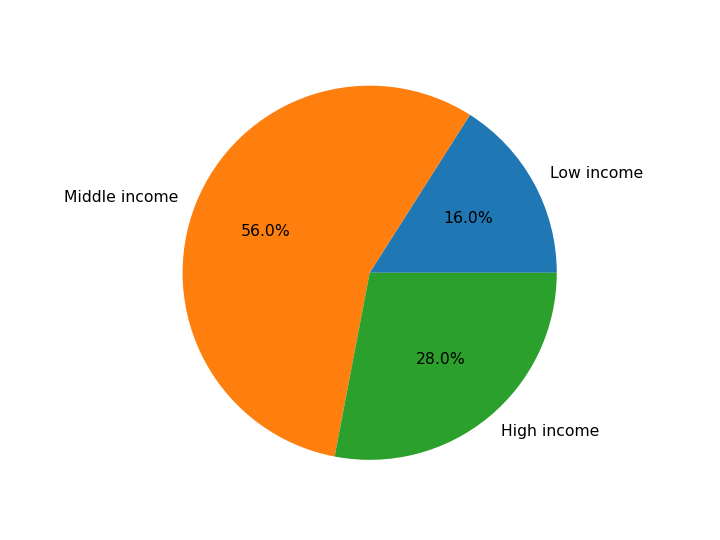

In [75]:
fig2, axis2 = plt.subplots()
axis2.pie(nmOfAllIncomeLevels,labels = ('Low income','Middle income',"High income"),autopct="%.1f%%")
axis2.axis('equal');

Овде може да видиме дека земјите со средно нивно на примања зафаќаат 56% од податочното множество, додека земјите со ниски и
високи примања се 16% и 28% од податочното множество соодветно.

## Наоѓање на мин/макс по колона
Во следниот дел се прикажуваат максималните и минималните вредности од секоја колона ( од колоните што имаат броева вредност ) и на која држава припаѓаат. Поради тоа што некои ќелии имаа букви или празни елементи, беше потребно да се обработат тие пред да се вршат пресметки на нив. За ќелиите каде што не содржеа податоци, на нивно место се ставаше вредноста " -1 " за да може понатаму да знаеме да не ги земаме во предвид тие ќелии поради тоа содржат невалиден елемент. Доаѓа до грешка во пресметувањата ако се одлучевме да ги замениме празните ќелии со нулта вредноста па затоа ја земаме вредноста -1, како индикатор за невалидна ќелија.

In [76]:
def formatNumber(num):
  if num % 1 == 0:
    return int(num)
  else:
    return num
#Making sure the column data contains only numbers and NO strings
for idx,label in enumerate(labels):
    if label=="Country" or label=="Income level" or label=="95% Confidence Interval":
        continue;
    columnValues = [re.sub("[^\d\.]","",str(w)) for w in theTable[label].values]
    """
    Turning all the values into float so we dont loose infrormation and also cells that don't have data,
    we set them to -1, so we don't take them into account when calculating statistics
    """
    for idx,tmp in enumerate(columnValues):
        if tmp!="":
            columnValues[idx]=float(tmp)
        else:
            columnValues[idx]=-1
    tmp1 = pd.Series(columnValues)

    #finding the Min,Max element of the column
    maxElement = float('-inf')
    minElement = float('inf')
    for el in tmp1:
        if el > maxElement and el!=-1:
            maxElement=el
        if el < minElement and el!=-1:
            minElement=el
    maxIndex=columnValues.index(maxElement)
    minIndex=columnValues.index(minElement)
    print("Country with max {} is {} -> {} ".format(label,theTable["Country"][maxIndex],formatNumber(maxElement)))
    print("Country with min {} is {} -> {} ".format(label,theTable["Country"][minIndex],formatNumber(minElement)))
    print()

Country with max Population is China -> 1411415375 
Country with min Population is Cook Islands -> 17379 

Country with max GNI per capita is Norway -> 82330 
Country with min GNI per capita is Burundi -> 280 

Country with max Reported number of road traffic deaths is India -> 150785 
Country with min Reported number of road traffic deaths is San Marino -> 0 

Country with max Point estimate is India -> 299091 
Country with min Point estimate is San Marino -> 0 

Country with max Estimated road traffic death rate is Liberia -> 35.9 
Country with min Estimated road traffic death rate is San Marino -> 0 

Country with max Drivers/Passengers of 4-wheeled vehicles is Libya -> 75 
Country with min Drivers/Passengers of 4-wheeled vehicles is Ethiopia -> 0 

Country with max Drivers/Passengers of 2 or 3 wheelers is Cook Islands -> 80 
Country with min Drivers/Passengers of 2 or 3 wheelers is Antigua and Barbuda -> 0 

Country with max Cyclists is Dominica -> 60 
Country with min Cyclists is 

## Пресметување процентуална разлика
Во следниот дел ќе разгледуваме колку предвидувањата на моделот што СЗО го користи за бројот на смртни случаеви во сообраќајот се разликува од пријавените бројки. Метриката што ќе ја користиме е процентуална разлика.


The mean percentage difference between the reported number of traffic deaths and the models estimate is: 54.599


<IPython.core.display.Javascript object>


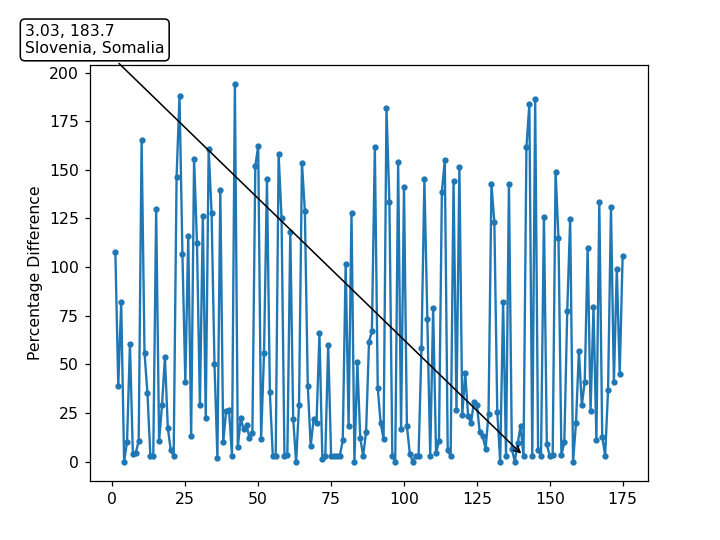

In [104]:
def calculatePercentageDifferenceAndChange():
    sumPercDifferences=0
    sumPercChanges=0
    percDifferences=[]
    percChanges=[]
    for idx,element in enumerate(theTable["Reported number of road traffic deaths"]):
        elementFromOtherColumn=theTable["Point estimate"][idx]
        if element == 0 and elementFromOtherColumn == 0:
            percDifferences.append(0)
            percChanges.append(0)
            continue
        difference=abs(elementFromOtherColumn-element)
        average=abs((element+elementFromOtherColumn)/2)
        
        
        differenceChange=((elementFromOtherColumn-element)/element)*100
        differencePercentage=(difference/average)*100
        
        percChanges.append(round(differenceChange,2))
        percDifferences.append(round(differencePercentage,2))
        
        sumPercDifferences+=differencePercentage
        sumPercChanges+=differenceChange
    return sumPercDifferences,sumPercChanges,percDifferences,percChanges

sumPercDifferences, sumPercChanges, percDifferences, percChanges = calculatePercentageDifferenceAndChange()
percDiffMean = sumPercDifferences / len(theTable["Point estimate"])
print("\nThe mean percentage difference between the reported number of traffic deaths and the models estimate is:", round(percDiffMean,3))
x = np.arange(1,176)
y = percDifferences
names = theTable["Country"].values

fig4,ax4 = plt.subplots()
line, = plt.plot(x,y, marker=".")

annot = ax4.annotate("", xy=(-30,210),
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)
ax4.set_ylabel('Percentage Difference')

def update_annot(ind):
    x,y = line.get_data()
    annot.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
    text = "{}\n{}".format(", ".join(list(map(str,y[ind["ind"]]))),
                          ", ".join([names[n] for n in ind["ind"]]))
    
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax4 or event.inaxes == ax5:
        cont, ind = line.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
                
cid1 = fig4.canvas.mpl_connect("motion_notify_event", hover)

Како што можеме да видиме во интерактивниот граф поголемиот дел од броевите се позиционирани во долниот дел од графот што значи предвидената бројка е блиску до вредноста на пријавената бројка на смрти случаеви. Ова е одлика на земјите со високи и средни примања и тие каде што има добра евиденција за смртните случаеви во сообраќајот. Процентуалната разлика е највисока за земјите што се со ниски примања и каде што има лоша евиденција за смртните случаевни.

Подобро може да воочиме колку поголеми предикции моделот за предвидување на смртните случаеви дава во следниот график. Овде користиме процентуална промена. Таа се разликува од предходната така што ја зема во предвид старата вредност на земјата што се разлгедува т.е пријавената бројка од самата држава. Овде лимитот на вредностите не е 200, туку може да биде многу поголем.

<IPython.core.display.Javascript object>


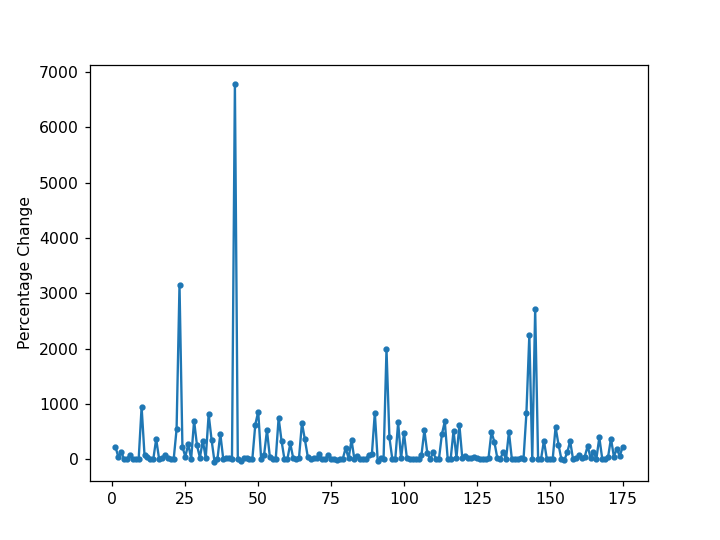

In [115]:
fig5,ax5 = plt.subplots()
y = percChanges
line, = plt.plot(x,y, marker=".")
annot = ax5.annotate("", xy=(-30,7500),
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)
ax5.set_ylabel('Percentage Change')
cid2 = fig5.canvas.mpl_connect("motion_notify_event", hover)
